In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [5]:
load_dotenv()

True

In [6]:
model = ChatGoogleGenerativeAI(model = "gemini-2.0-flash")

In [ ]:
# Create state

class BlogState(TypedDict):
    title: str
    outline:str
    content:str

In [16]:
# Create function to generate outline

def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title'] 

    # create prompt and call llm to generate outline
    prompt = f'Generate 300 words of outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [17]:
# Create function to generate blog

def create_blog(state: BlogState) -> BlogState:

    # fetch title and outline

    title = state['title']
    outline = state['outline']

    # create prompt and call llm to generate blog
    prompt = f'Write a short blog on the title - {title} using the follwing outline \n {outline}'
    content = model.invoke(prompt).content

    # update state
    state['content'] = content

    return state

In [23]:
# Create graph

graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

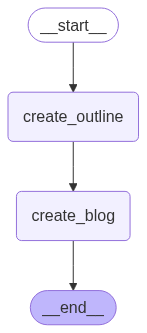

In [28]:
# Draw graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [26]:
# Execute graph

initial_state = {'title': 'Shark Tank effect in India'}
final_state = workflow.invoke(initial_state)
print(final_state)

{'title': 'Shark Tank effect in India', 'outline': '**I. Introduction**\n\n*   **Hook:** Start with a captivating statistic or anecdote about the impact of Shark Tank India on Indian entrepreneurship.\n*   **Background:** Briefly introduce Shark Tank and its global success. Explain the premise of the show.\n*   **Thesis statement:** The arrival of Shark Tank India has sparked a significant "Shark Tank effect," influencing entrepreneurial aspirations, investment trends, and consumer behavior within the Indian startup ecosystem.\n\n**II. Increased Entrepreneurial Aspirations**\n\n*   **Democratization of Entrepreneurship:** Discuss how the show has made entrepreneurship more accessible and relatable to the average Indian.\n*   **Role Models:** Highlight how the "Sharks" have become role models, inspiring viewers to pursue their own business ventures.\n*   **Startup Culture Awareness:** Explain how the show has raised awareness about the startup culture, business models, and the process o

In [42]:
print(f'Title \n', final_state['title']) 
print(f'Outline \n', final_state['outline'])
print(f'Blog \n', final_state['content'])

Title 
 Shark Tank effect in India
Outline 
 **I. Introduction**

*   **Hook:** Start with a captivating statistic or anecdote about the impact of Shark Tank India on Indian entrepreneurship.
*   **Background:** Briefly introduce Shark Tank and its global success. Explain the premise of the show.
*   **Thesis statement:** The arrival of Shark Tank India has sparked a significant "Shark Tank effect," influencing entrepreneurial aspirations, investment trends, and consumer behavior within the Indian startup ecosystem.

**II. Increased Entrepreneurial Aspirations**

*   **Democratization of Entrepreneurship:** Discuss how the show has made entrepreneurship more accessible and relatable to the average Indian.
*   **Role Models:** Highlight how the "Sharks" have become role models, inspiring viewers to pursue their own business ventures.
*   **Startup Culture Awareness:** Explain how the show has raised awareness about the startup culture, business models, and the process of securing fundin